# Notebook - Questão 7

- **Usando os pacotes innvestigate e keras-vis no Google Colab**

  - O innvestigate requer a versão 1.15 do Tensorflow
  - O keras-vis requer a versão 1.1.0 do scipy
  - A versão do keras-vis disponível no pypi apresenta erros, sendo necessário instalar o código fornecido no github.

  - **OBS: após a instalação dos pacotes, dar um Restart runtime no notebook.**

In [ ]:
!pip install innvestigate
!pip install scipy==1.1.0
!pip install git+https://github.com/raghakot/keras-vis.git -U

     |████████████████████████████████| 102kB 5.0MB/s 
     |████████████████████████████████| 317kB 11.4MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 31.2MB 103kB/s 
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-7lb87pjt
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-7lb87pjt
  Created wheel for keras-vis: filename=

### Imports

In [ ]:
%tensorflow_version 1.x  # utiliza a versão 1.x já presente no Colab

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import innvestigate
import keras

from vis.visualization import visualize_activation
from vis.utils import utils

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x  # utiliza a versão 1.x já presente no Colab`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


### Download MNIST:

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 1s 0us/step


### Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### Training

In [ ]:
model.get_config()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.2878 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1174 - accuracy: 0.9652
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0916 - accuracy: 0.9725
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0754 - accuracy: 0.9769
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0664 - accuracy: 0.9795


### Evaluation

In [ ]:
evaluation = model.evaluate(x_test, y_test)

model.save('mnist_model.h5')

10000/10000 [==============================] - 0s 50us/step


### Simple usage of innvestigate

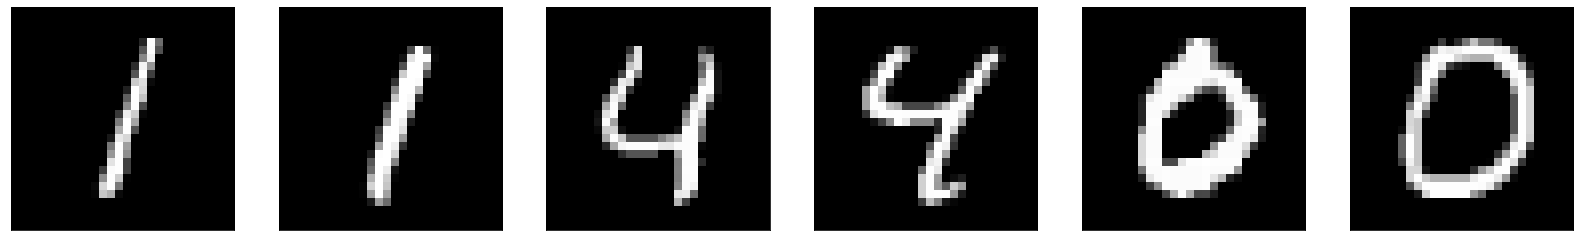

In [ ]:
model = keras.models.load_model('mnist_model.h5')

model_wo_sm = innvestigate.utils.model_wo_softmax(model)

imagens = x_test[0:20]

index = np.array([2,5,4,6,3,10])

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        fig.add_subplot(1,6,ind)
        plt.imshow(imagens[index[ind-1]].squeeze(), cmap='gray', interpolation='nearest')
        #show(x_train_images[ind])
        plt.xticks([])
        plt.yticks([])
        

**GRADIENT**

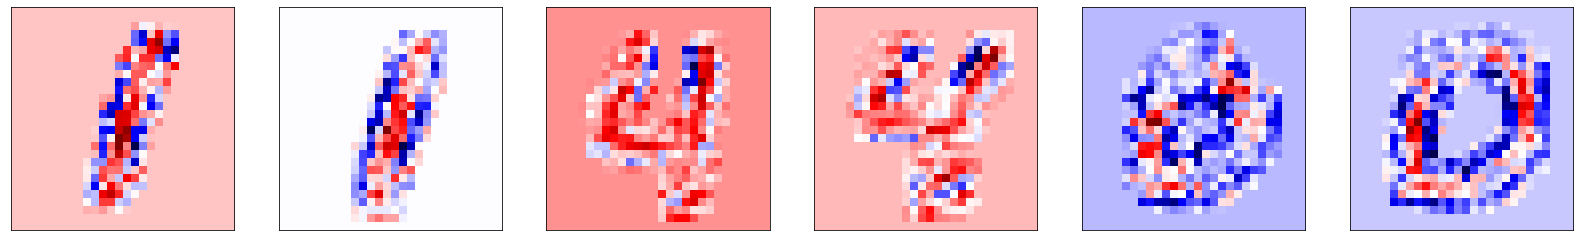

In [ ]:
analyzer = innvestigate.analyzer.Gradient(model=model_wo_sm)

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])


**SmoothGrad**

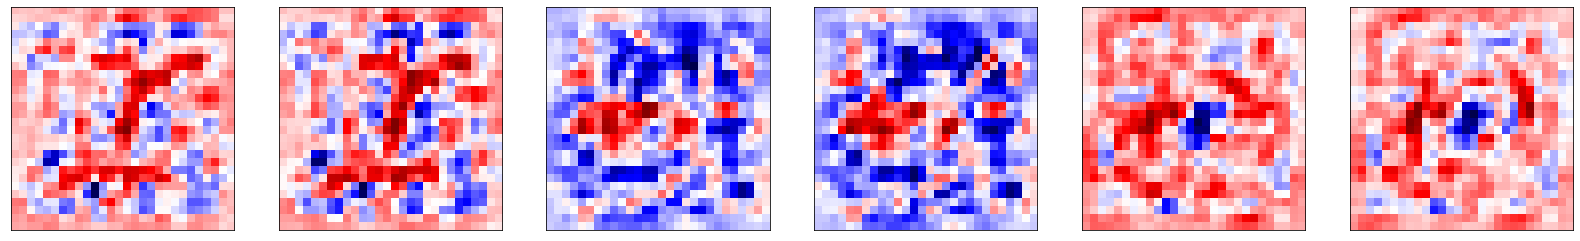

In [ ]:
analyzer = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
analysis = analyzer.analyze(imagem)

#plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])

**DeepTaylor**

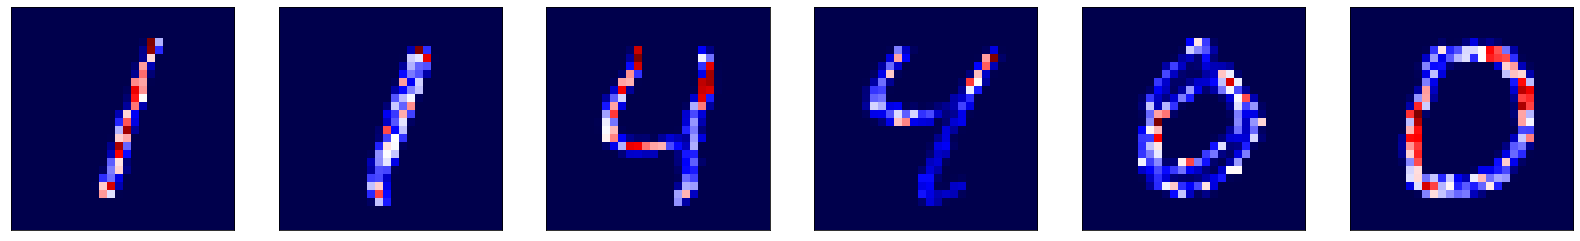

In [ ]:
analyzer = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
analysis = analyzer.analyze(imagem)

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])

**LRPAlphaBeta**

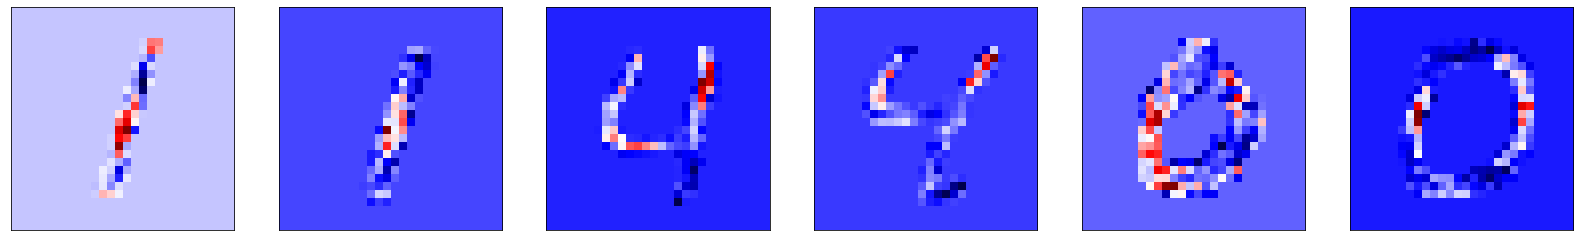

In [ ]:
analyzer = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,
alpha=2, beta=1)

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])

**LRPEpsilon**

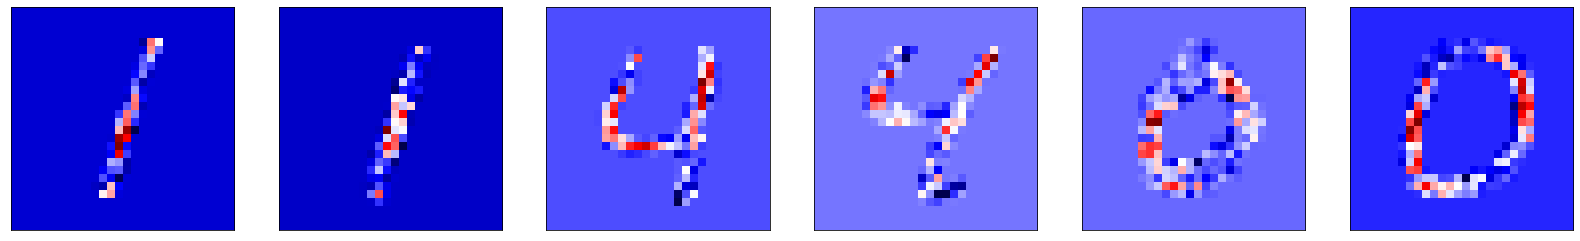

In [ ]:
analyzer = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm,
epsilon=1e-7)

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])

**LRPZ**

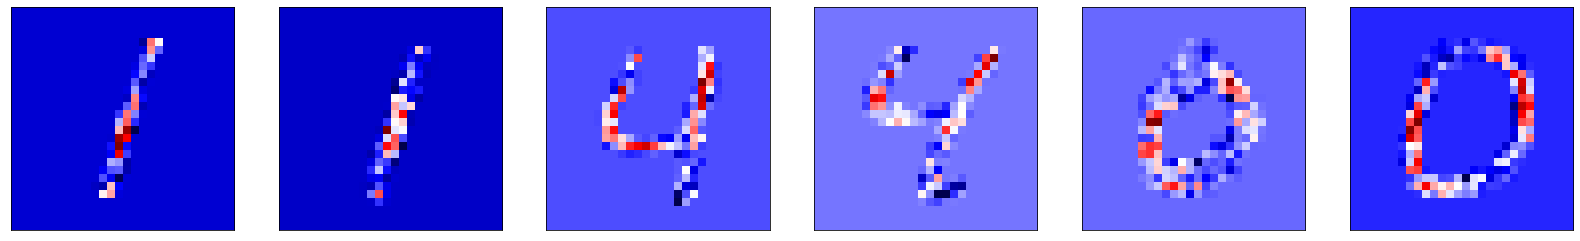

In [ ]:
analyzer = innvestigate.analyzer.LRPZ(model=model_wo_sm)
analysis = analyzer.analyze(imagem)

fig = plt.figure(figsize=(28,28))
for ind in range(1, 7, 1):
        imagem=imagens[index[ind-1]]
        imagem=imagem.reshape((1,28,28,1))
        analysis = analyzer.analyze(imagem)
        fig.add_subplot(1,6,ind)
        plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')        
        plt.xticks([])
        plt.yticks([])

### Simple usage of keras-vis

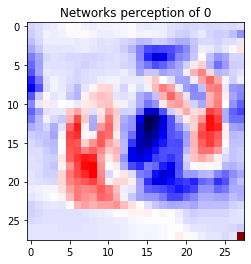

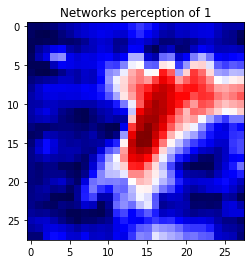

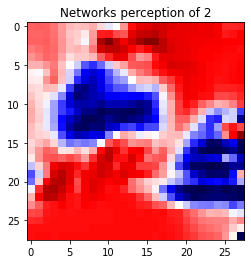

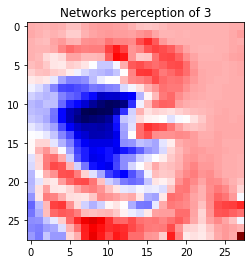

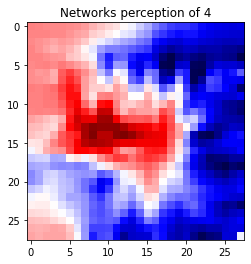

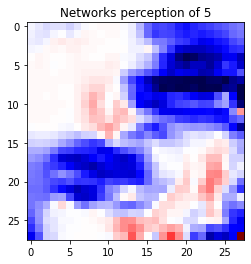

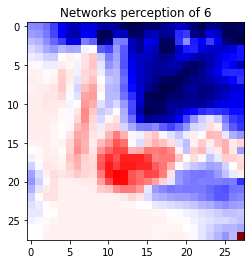

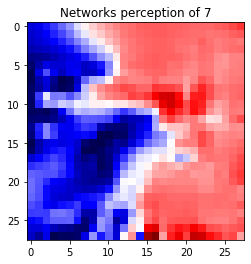

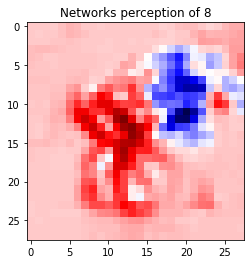

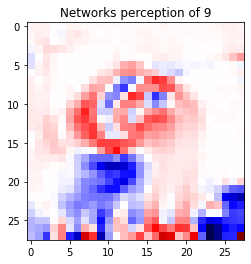

In [ ]:
model = keras.models.load_model('mnist_model.h5')

layer_idx = utils.find_layer_idx(model, 'dense_2')
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)

#filter_idx = 9
for filter_idx in np.arange(10):
  img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose= False , max_iter=1000, tv_weight=1., lp_norm_weight=0.)
  #plt.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
  plt.figure()
  plt.title('Networks perception of {}'.format(filter_idx))
  plt.imshow(img[..., 0].squeeze(), cmap='seismic', interpolation='nearest')



--------------------------------------------------------
### DISCUSSÕES

#### **7.a)**
* **Gradient:** O método apresenta O gradiente do neurônio de saída em relação à entrada. O gradiente representa quanta diferença uma pequena mudança em cada pixel da entrada faria na pontuação da sua classificação. Como resultado, pode-se esperar que o mapa resultante possa destacar as regiões mais relevantes.  Nota-se que o nas regiões escuras das entradas são geradas regiões monocromáticas, enquanto que nas  regiões claras (que compreendem os dígitos) é possível observar uma intensidade maior das cores se acentuando nas partes mais internas das figuras. Os pixels de cores mais intensas possuem maior relevância para a classificação (tanto positiva quanto negativa). 
* **SmoothGrad:** O método calcula a média do gradiente sobre o número de entradas com ruído adicionado. A ideia central é tomando a imagem de interesse, amostrar imagens semelhantes adicionando ruído à imagem e, em seguida, tirar a média dos mapas de sensibilidade resultantes para cada imagem amostrada. No geral, espera-se um efeito de "denoising" do Gradiente. No entanto, não foi o que foi percebido nas imagens analisadas, em que os mapas se tornaram muito ruidosos em comparação aos anteriores.
* **DeepTaylor:** O método calcula para cada neurônio um ponto raiz, que está próximo à entrada, mas cujo valor de saída é 0, e usa essa diferença para estimar a atribuição de cada neurônio recursivamente. Assim, a técnica mapeia em um heatmap a importânica dos pixels da entrada levando em consideração a relevância dos neurônios. É possível observar dos mapeamentos gerados que os pixels mais importantes são aqueles localizados em regiões que mais caracterizam a classe em questão, enquanto que nas regiões menos importantes (geralmente comuns à várias classes) as cores são menos intensas ou com relevancia negativa. 
* **LRP:** Os métodos LRP(*Layer-wise relevance propagation*) atribuem recursivamente a relevância de entrada de cada neurônio proporcional à sua contribuição da saída do neurônio. Essencialmente, começando na saída da RNA, e avança-se na direção reversa, mapeando progressivamente a previsão nas camadas inferiores. O procedimento para uma vez que a entrada de a rede é alcançada. Contrastando com as técnicas de gradiente, as técnicas LRP conseguem carregar propriedades de Coservação, Positividade, Continuidade e Seletividade em seus mapeamentos. Qualitativamente foram obtidos resultados similares para os três métodos abordados: **LRPAlphaBeta**,**LRPEpsilon** e **LRPZ**. Todos as técnicas LRP apontaram relevancias semelhantes para as regiões dos dígitos analisados, em que as regiões vermelhas (em sua maior parte contornos dos digitos) são mais relevantes, enquanto as azuis possuem relevância negativa. Não obstante, os métodos LRPEpsilon e LRPZ atribuiram relevancias maiores para regiões (internas aos digitos) em que o método LRPAlphaBeta não o fez tão significativamente (destaque para a classe "0"). 

#### **7.b)**
A biblioteca Keras-Vis gera heatmaps com padrões de entrada que maximizam a resposta para uma classe de interesse. Podemos verificar dos resultados das classes 0~9 que os padrões que geram maxima ativação do modelo para cada padrão são aqueles que possuem os contornos dos dígitos (mesmo que parcialmente). Mais ainda, tão importante quanto os pixels de máxima ativação (indicados pelas cores vermelhas) são as regiões de ativação negativa (indicadas pelas cores azuis), que penalizam os pixels em algumas regiões em que determinada classe não deve ter pixels. De fato, verifica-se uma combinação desses dois comportamentos em todas as classes analisadas (para algumas mais visíveis, como nas classes "3" e "7"), que corroboram para as repectivas ativações máximas. 
